## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import and read the charity_data.csv on local machine:
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Check for NAs, duplicates and get the shape of the data:
print(f'The shape of the application data is: {application_df.shape}')
print(f'The number of NAs in the application data: {application_df.isnull().sum()}')
print(f'The duplicate rows of NAs in the application data: {application_df.duplicated().sum()}')

The shape of the application data is: (34299, 12)
The number of NAs in the application data: EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64
The duplicate rows of NAs in the application data: 0


In [4]:
# Examine categorical variables
print(application_df['USE_CASE'].value_counts())
print('-------------------------------------------')
print(application_df['STATUS'].value_counts())
print('-------------------------------------------')
print(application_df['INCOME_AMT'].value_counts())
print('-------------------------------------------')
print(application_df['IS_SUCCESSFUL'].value_counts())
print('-------------------------------------------')
print(application_df['SPECIAL_CONSIDERATIONS'].value_counts())
print('-------------------------------------------')

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
-------------------------------------------
1    34294
0        5
Name: STATUS, dtype: int64
-------------------------------------------
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64
-------------------------------------------
1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64
-------------------------------------------
N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64
-------------------------------------------


In [5]:
# Drop the non-beneficial ID columns, 'EIN','NAME', 'STATUS' and 'SPECIAL_CONSIDERATIONS'.
reduced_df = application_df.drop(['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'], axis=1)

In [6]:
# Determine the number of unique values in each column.
print(reduced_df.nunique())

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64


In [7]:
# Look at APPLICATION_TYPE value counts for binning
print(reduced_df['APPLICATION_TYPE'].value_counts())

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Model 1: 500
app_cutoff = 150
application_counts = reduced_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = list(application_counts[application_counts < app_cutoff].index)

# Replace in dataframe
for app in application_types_to_replace:
    reduced_df['APPLICATION_TYPE'] = reduced_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
reduced_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
clsf_counts = reduced_df["CLASSIFICATION"].value_counts()
clsf_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts_oneUP = clsf_counts[clsf_counts > 1]
class_counts_oneUP

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
# Model 1: 1000
class_cutoff = 800
classifications_to_replace = list(clsf_counts[clsf_counts < class_cutoff].index)

# Replace in dataframe
for cls in classifications_to_replace:
    reduced_df['CLASSIFICATION'] = reduced_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
reduced_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
# Using one-hot encoding
df_OneHot = pd.get_dummies(reduced_df)
df_OneHot

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,108590,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,6692,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,142590,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,5000,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,5000,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34297,5000,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


## Step 3: Model Optimisation

In [13]:
# Split our preprocessed data into our features and target arrays
# The target variable is 'IS_SUCCESSFUL'.
y = df_OneHot['IS_SUCCESSFUL'].values
X = df_OneHot.drop(['IS_SUCCESSFUL'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

(25724, 41) (8575, 41)


### Model 2

###### Model optimisation methods implemented:
1) Removed 2 additional features (STATUS & SPECIAL CONSIDERATION)

2) Added 1 more hidden layers (from Model 1: 2 Hidden Layers) - Model 2: 3

3) Changed number of neutrons for each hidden layer (including output layer): 64, 32, 16, 1

4) Used activation functions: relu, relu, relu, sigmoid

5) Added dropout layers that can help prevent overfitting and improve the generalisation of the model

6) Epochs: 200 - increased to deepen training of the model

7) Changed cutoffs for APPLICATION_TYPE & CLASSIFICATION

In [15]:
from tensorflow.keras.layers import Dropout

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train[0])
hidden_layer1 = 63
hidden_layer2 = 32
hidden_layer3 = 16

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer1, input_dim=input_features, activation="relu"))

# Add dropout layer
nn.add(Dropout(0.2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer2 ,activation='relu'))

# Add dropout layer
nn.add(Dropout(0.2))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 63)                2646      
                                                                 
 dropout (Dropout)           (None, 63)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2048      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,239
Trainable params: 5,239
Non-trainabl

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])

In [18]:
# Define a callback function that saves the model's weight every five epochs.
model2_weights = tf.keras.callbacks.ModelCheckpoint(
    filepath='./Model2/weights',
    verbose= 1,
    save_weights_only= True,
    mode='auto',
    save_freq='epoch',
    period=5
)

In [19]:
# Train the model
epochs = 200
fit_model = nn.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, callbacks=[model2_weights])

Epoch 1/200
804/804 [==============================] - 2s 1ms/step - loss: 0.5872 - accuracy: 0.7109
Epoch 2/200
804/804 [==============================] - 1s 952us/step - loss: 0.5649 - accuracy: 0.7282
Epoch 3/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5599 - accuracy: 0.7298
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5603 - accuracy: 0.7297
Epoch 5/200
762/804 [===========================>..] - ETA: 0s - loss: 0.5571 - accuracy: 0.7308
Epoch 5: saving model to ./Model2\weights
804/804 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.7306
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.7318
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7306
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7307
Epoch 9/200
804/804 [==============================] - 1s 1ms/s

804/804 [==============================] - 1s 2ms/step - loss: 0.5444 - accuracy: 0.7358
Epoch 66/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7364
Epoch 67/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.7355
Epoch 68/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7350
Epoch 69/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5445 - accuracy: 0.7367
Epoch 70/200
778/804 [============================>.] - ETA: 0s - loss: 0.5439 - accuracy: 0.7357
Epoch 70: saving model to ./Model2\weights
804/804 [==============================] - 1s 1ms/step - loss: 0.5444 - accuracy: 0.7354
Epoch 71/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5443 - accuracy: 0.7367
Epoch 72/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5439 - accuracy: 0.7369
Epoch 73/200
804/804 [==============================] - 1s 1ms/step -

771/804 [===========================>..] - ETA: 0s - loss: 0.5414 - accuracy: 0.7392
Epoch 130: saving model to ./Model2\weights
804/804 [==============================] - 1s 1ms/step - loss: 0.5421 - accuracy: 0.7384
Epoch 131/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5419 - accuracy: 0.7374
Epoch 132/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5416 - accuracy: 0.7397
Epoch 133/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5412 - accuracy: 0.7372
Epoch 134/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5422 - accuracy: 0.7379
Epoch 135/200
766/804 [===========================>..] - ETA: 0s - loss: 0.5416 - accuracy: 0.7363
Epoch 135: saving model to ./Model2\weights
804/804 [==============================] - 1s 2ms/step - loss: 0.5410 - accuracy: 0.7365
Epoch 136/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5425 - accuracy: 0.7371
Epoch 137/200
804/804 [============

804/804 [==============================] - 1s 2ms/step - loss: 0.5407 - accuracy: 0.7374
Epoch 194/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5409 - accuracy: 0.7376
Epoch 195/200
796/804 [============================>.] - ETA: 0s - loss: 0.5402 - accuracy: 0.7392
Epoch 195: saving model to ./Model2\weights
804/804 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.7395
Epoch 196/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7392
Epoch 197/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5410 - accuracy: 0.7370
Epoch 198/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5403 - accuracy: 0.7382
Epoch 199/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.7395
Epoch 200/200
762/804 [===========================>..] - ETA: 0s - loss: 0.5417 - accuracy: 0.7381
Epoch 200: saving model to ./Model2\weights
804/804 [============

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.7264
Loss: 0.5523158311843872, Accuracy: 0.7264139652252197


<AxesSubplot:>

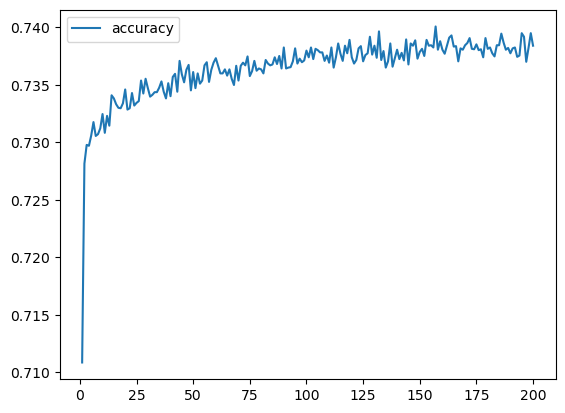

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [22]:
# Export our model to HDF5 file
nn.save("Models/AlphabetSoupCharity_Optimization.h5")